<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/main/pcvplanner_train%26test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

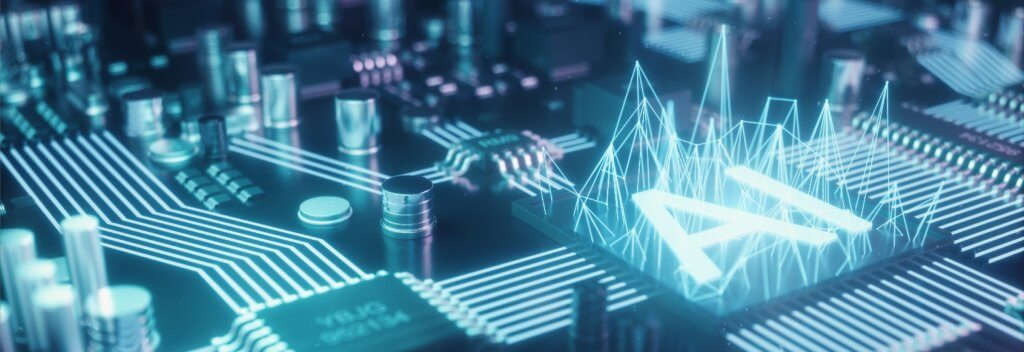

In [76]:
import pandas as pd 

In [77]:
# Step 1: Load the data
covid_19_PMV = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid_19_PMV.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [78]:
covid_19_PMV.shape 

(94657, 60)

In [79]:
pd.options.display.max_columns= 100

In [80]:
covid_19_PMV.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


# Info Method 

In [81]:
covid_19_PMV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94657 entries, 0 to 94656
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               94657 non-null  object 
 1   continent                              90186 non-null  object 
 2   location                               94657 non-null  object 
 3   date                                   94657 non-null  object 
 4   total_cases                            91559 non-null  float64
 5   new_cases                              91556 non-null  float64
 6   new_cases_smoothed                     90546 non-null  float64
 7   total_deaths                           81588 non-null  float64
 8   new_deaths                             81744 non-null  float64
 9   new_deaths_smoothed                    90546 non-null  float64
 10  total_cases_per_million                91070 non-null  float64
 11  ne

# Count method

In [83]:
covid_19_PMV_missing= covid_19_PMV.isna()
covid_19_PMV_missing.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
2,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
4,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True


# Sum method 

In [85]:
covid_19_PMV_num_missing= covid_19_PMV_missing.sum()
covid_19_PMV_num_missing

iso_code                                     0
continent                                 4471
location                                     0
date                                         0
total_cases                               3098
new_cases                                 3101
new_cases_smoothed                        4111
total_deaths                             13069
new_deaths                               12913
new_deaths_smoothed                       4111
total_cases_per_million                   3587
new_cases_per_million                     3590
new_cases_smoothed_per_million            4595
total_deaths_per_million                 13545
new_deaths_per_million                   13389
new_deaths_smoothed_per_million           4595
reproduction_rate                        18346
icu_patients                             85138
icu_patients_per_million                 85138
hosp_patients                            82842
hosp_patients_per_million                82842
weekly_icu_ad

In [86]:
len(covid_19_PMV)

94657

In [88]:
covid_19_PMV.isna().mean().round(4) * 100

iso_code                                  0.00
continent                                 4.72
location                                  0.00
date                                      0.00
total_cases                               3.27
new_cases                                 3.28
new_cases_smoothed                        4.34
total_deaths                             13.81
new_deaths                               13.64
new_deaths_smoothed                       4.34
total_cases_per_million                   3.79
new_cases_per_million                     3.79
new_cases_smoothed_per_million            4.85
total_deaths_per_million                 14.31
new_deaths_per_million                   14.14
new_deaths_smoothed_per_million           4.85
reproduction_rate                        19.38
icu_patients                             89.94
icu_patients_per_million                 89.94
hosp_patients                            87.52
hosp_patients_per_million                87.52
weekly_icu_ad

In [89]:
covid_19_filtered= covid_19_PMV[['location','date','people_vaccinated','people_fully_vaccinated','population','population_density','gdp_per_capita']]
covid_19_filtered

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
0,Afghanistan,2020-02-24,NaN,NaN,38928341.0,54.422,1803.987
1,Afghanistan,2020-02-25,NaN,NaN,38928341.0,54.422,1803.987
2,Afghanistan,2020-02-26,NaN,NaN,38928341.0,54.422,1803.987
3,Afghanistan,2020-02-27,NaN,NaN,38928341.0,54.422,1803.987
4,Afghanistan,2020-02-28,NaN,NaN,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
94652,Zimbabwe,2021-06-05,686636.0,375315.0,14862927.0,42.729,1899.775
94653,Zimbabwe,2021-06-06,687321.0,380786.0,14862927.0,42.729,1899.775
94654,Zimbabwe,2021-06-07,688696.0,385275.0,14862927.0,42.729,1899.775
94655,Zimbabwe,2021-06-08,689397.0,389412.0,14862927.0,42.729,1899.775


In [90]:
covid_19_filtered.dropna(inplace=True)

In [91]:
covid_19_counts= covid_19_filtered["location"].value_counts()
covid_19_counts

World                           165
Germany                         165
Belgium                         162
Israel                          157
Denmark                         156
                               ... 
Democratic Republic of Congo      1
Liberia                           1
Rwanda                            1
Lesotho                           1
Ghana                             1
Name: location, Length: 161, dtype: int64

In [92]:
covid_19_counts[covid_19_counts>1].index

Index(['World', 'Germany', 'Belgium', 'Israel', 'Denmark', 'Canada',
       'Slovenia', 'United Kingdom', 'Estonia', 'Chile',
       ...
       'Mauritius', 'Mozambique', 'United Arab Emirates',
       'Bosnia and Herzegovina', 'Congo', 'Fiji', 'Benin',
       'Central African Republic', 'Togo', 'Timor'],
      dtype='object', length=153)

In [93]:
covid_19_filtered2=covid_19_filtered["location"].isin(covid_19_counts[covid_19_counts>1].index)
covid_19_filtered2

442      True
451      True
455      True
457      True
458      True
         ... 
94652    True
94653    True
94654    True
94655    True
94656    True
Name: location, Length: 8795, dtype: bool

In [94]:
covid_19_filter= covid_19_filtered[covid_19_filtered2]
covid_19_filter

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
442,Afghanistan,2021-05-11,448878.0,55624.0,38928341.0,54.422,1803.987
451,Afghanistan,2021-05-20,470341.0,77560.0,38928341.0,54.422,1803.987
455,Afghanistan,2021-05-24,476367.0,96910.0,38928341.0,54.422,1803.987
457,Afghanistan,2021-05-26,479372.0,111082.0,38928341.0,54.422,1803.987
458,Afghanistan,2021-05-27,479574.0,113739.0,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
94652,Zimbabwe,2021-06-05,686636.0,375315.0,14862927.0,42.729,1899.775
94653,Zimbabwe,2021-06-06,687321.0,380786.0,14862927.0,42.729,1899.775
94654,Zimbabwe,2021-06-07,688696.0,385275.0,14862927.0,42.729,1899.775
94655,Zimbabwe,2021-06-08,689397.0,389412.0,14862927.0,42.729,1899.775


In [95]:
covid_19_filter['location'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Lao

In [96]:
covid_19_final=covid_19_filter[covid_19_filter.location != 'World']
covid_19_final

,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
442,Afghanistan,2021-05-11,448878.0,55624.0,38928341.0,54.422,1803.987
451,Afghanistan,2021-05-20,470341.0,77560.0,38928341.0,54.422,1803.987
455,Afghanistan,2021-05-24,476367.0,96910.0,38928341.0,54.422,1803.987
457,Afghanistan,2021-05-26,479372.0,111082.0,38928341.0,54.422,1803.987
458,Afghanistan,2021-05-27,479574.0,113739.0,38928341.0,54.422,1803.987
...,...,...,...,...,...,...,...
94652,Zimbabwe,2021-06-05,686636.0,375315.0,14862927.0,42.729,1899.775
94653,Zimbabwe,2021-06-06,687321.0,380786.0,14862927.0,42.729,1899.775
94654,Zimbabwe,2021-06-07,688696.0,385275.0,14862927.0,42.729,1899.775
94655,Zimbabwe,2021-06-08,689397.0,389412.0,14862927.0,42.729,1899.775


In [97]:
covid_19_final['location'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Lao

In [98]:
covid_19_final.to_csv('covid_19_ready_PMV.csv')

In [99]:
covid_19_ready_PMV = pd.read_csv('covid_19_ready_PMV.csv')
covid_19_ready_PMV.head()

,Unnamed: 0,location,date,people_vaccinated,people_fully_vaccinated,population,population_density,gdp_per_capita
0,442,Afghanistan,2021-05-11,448878.0,55624.0,38928341.0,54.422,1803.987
1,451,Afghanistan,2021-05-20,470341.0,77560.0,38928341.0,54.422,1803.987
2,455,Afghanistan,2021-05-24,476367.0,96910.0,38928341.0,54.422,1803.987
3,457,Afghanistan,2021-05-26,479372.0,111082.0,38928341.0,54.422,1803.987
4,458,Afghanistan,2021-05-27,479574.0,113739.0,38928341.0,54.422,1803.987


In [100]:
covid_19_filtered_PMV= covid_19_ready_PMV[['date','people_fully_vaccinated']]
covid_19_filtered_PMV

,date,people_fully_vaccinated
0,2021-05-11,55624.0
1,2021-05-20,77560.0
2,2021-05-24,96910.0
3,2021-05-26,111082.0
4,2021-05-27,113739.0
...,...,...
8617,2021-06-05,375315.0
8618,2021-06-06,380786.0
8619,2021-06-07,385275.0
8620,2021-06-08,389412.0


In [101]:
covid_19_filtered_PMV.to_csv('covid_19_filtered_PMV.csv')

### Step1-Read the data 

In [102]:
df= pd.read_csv('covid_19_filtered_PMV.csv', parse_dates=['date'], index_col=['date'])
df

,Unnamed: 0,people_fully_vaccinated
date,,
2021-05-11,0,55624.0
2021-05-20,1,77560.0
2021-05-24,2,96910.0
2021-05-26,3,111082.0
2021-05-27,4,113739.0
...,...,...
2021-06-05,8617,375315.0
2021-06-06,8618,380786.0
2021-06-07,8619,385275.0


### Resample the data : Agregation of data

In [103]:
tsdf= df['people_fully_vaccinated'].resample('D').sum()
tsdf.head(20)

date
2020-12-27         17.0
2020-12-28         56.0
2020-12-29        790.0
2020-12-30        924.0
2020-12-31       1073.0
2021-01-01       1083.0
2021-01-02       1381.0
2021-01-03      23358.0
2021-01-04       1443.0
2021-01-05       1490.0
2021-01-06       1950.0
2021-01-07       2628.0
2021-01-08       3929.0
2021-01-09       4922.0
2021-01-10     652319.0
2021-01-11     442375.0
2021-01-12     494236.0
2021-01-13     570945.0
2021-01-14    1994592.0
2021-01-15    2311955.0
Freq: D, Name: people_fully_vaccinated, dtype: float64

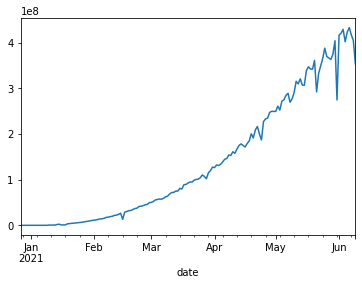

In [104]:
tsdf.plot()

### Stationarity check 

In [105]:
import statsmodels.api as sm

In [106]:
from statsmodels.tsa.stattools import adfuller

In [107]:
adftest= adfuller(tsdf)

In [108]:
print ('pvalue of adfuller test is :', adftest[1])

pvalue of adfuller test is : 0.9952397545218478


### Pavlaue > .05 = time series is not stationary 

### Step 4 Train test split 

In [109]:
len(tsdf)

165

In [110]:
train=tsdf[:120]
test= tsdf[120:]

### STep 5 : Build Arima model 
Determine Hyperparameters (p,d,q) with lowest RMSE 

In [111]:
#p =7, d=0, q=0

In [112]:
import itertools

In [113]:
p= range(0,8)
q= range(0,8)
d= range(0,2)

In [114]:
pdq_combination= list(itertools.product(p,d,q))

In [115]:
rmse=[]
order1=[]

In [116]:
for pdq in pdq_combination:
  try:
    model=ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train), end=(len(tsdf)-1))
    error= np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

  except:
    continue 

In [117]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])
results.to_csv('ARIMA_result04.csv')

In [118]:
#making data frame from csv file
data=pd.read_csv("/content/ARIMA_result04.csv")

In [119]:
data.sort_values(["RMSE"], axis=0,
                 ascending=True, inplace=True)
#display
data.head(20)

,Unnamed: 0,RMSE
62,"(7, 0, 0)",1.137759e+08
56,"(6, 0, 0)",1.205903e+08
48,"(5, 0, 0)",1.211903e+08
24,"(2, 0, 0)",1.234087e+08
16,"(1, 0, 0)",1.235171e+08
33,"(3, 0, 0)",1.285256e+08
41,"(4, 0, 0)",1.297561e+08
7,"(0, 0, 7)",2.636889e+08
6,"(0, 0, 6)",2.655988e+08
5,"(0, 0, 5)",2.662518e+08


### Step 6 Import ARIMA

In [120]:
from statsmodels.tsa.arima_model import ARIMA

In [121]:
model=ARIMA(train,order=(7,0,0)).fit()

### Step 7 Predict set Data set 

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
pred=model.predict(start= len(train),end=len(tsdf)-1)

In [124]:
pred.head(10)

2021-04-26    2.182033e+08
2021-04-27    2.037068e+08
2021-04-28    2.124089e+08
2021-04-29    2.285852e+08
2021-04-30    2.129483e+08
2021-05-01    2.177961e+08
2021-05-02    2.249929e+08
2021-05-03    2.238789e+08
2021-05-04    2.183704e+08
2021-05-05    2.278872e+08
Freq: D, dtype: float64

### Step 8 Model Validation 

In [125]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [126]:
error =np.sqrt(mean_squared_error(test,pred))
error

113775908.51093148

In [127]:
test .mean(), np.sqrt(test.var())

(328881170.8888889, 60606010.39001632)

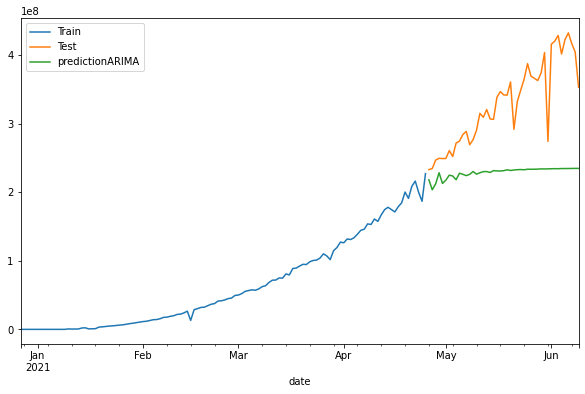

In [128]:
train.plot(legend= True, label = 'Train', figsize=(10,6))
test.plot(legend= True, label='Test')
pred.plot(legend= True, label= 'predictionARIMA')

### Step 9 Predict future data 

In [129]:
final_model = ARIMA(tsdf, order=(7,0,0)).fit()

In [130]:
prediction = final_model.predict(len(tsdf),len(tsdf)+180 )
prediction.head()

2021-06-10    3.891586e+08
2021-06-11    3.811963e+08
2021-06-12    3.779347e+08
2021-06-13    3.717144e+08
2021-06-14    3.730441e+08
Freq: D, dtype: float64

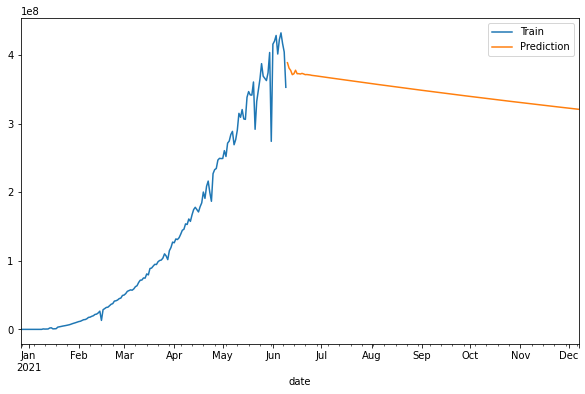

In [131]:
tsdf.plot(legend= True, label = 'Train', figsize=(10,6))
prediction.plot(legend= True, label='Prediction')